In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline


## Data Loading

In [2]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("train.csv")
# Read CSV test data file into DataFrame
test_df = pd.read_csv("test.csv")
# preview train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.shape[0]

891

In [4]:
test_df.shape[0]

418

In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Preprocessing

In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handling Missing values


### Age

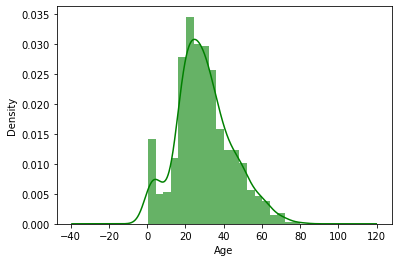

In [7]:
ax = train_df["Age"].hist(bins=20, density=True, stacked=True, color='green', alpha=0.6)
train_df["Age"].plot(kind='density', color='green')
ax.set(xlabel='Age')
#plt.xlim(-10,85)
plt.show()

In [8]:
train_df["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [9]:
# mean age
print('The mean of "Age" is %.2f' %(train_df["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(train_df["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


In [10]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)

### Cabin

In [11]:
train_df["Cabin"].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
F33            3
              ..
E58            1
A36            1
D56            1
D46            1
E38            1
Name: Cabin, Length: 147, dtype: int64

### 687 values are missing so no point in filling missing values

### Embark

In [12]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
print('The most common boarding port of embarkation is %s.' %train_df['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


In [14]:
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)

In [15]:
train_data.drop('Cabin', axis=1, inplace=True)

In [16]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### Handling Categorical data

### Name is not palyng any role so deleting it

In [19]:
train_data.drop('Name', axis=1, inplace=True)

### Sex

In [20]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [21]:
train_data.loc[train_data["Sex"] == "male", "Sex"] = 0

In [22]:
train_data['Sex'].value_counts()

0         577
female    314
Name: Sex, dtype: int64

In [23]:
train_data.loc[train_data["Sex"] == "female", "Sex"] = 1

In [24]:
train_data['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

### Ticket is not playng any role so deleting it

In [25]:
train_data.drop('Ticket', axis=1, inplace=True)

In [26]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


### Embarked

In [27]:
train_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [29]:
train_data.loc[train_data["Embarked"] == "S", "Embarked"] = 1
train_data.loc[train_data["Embarked"] == "C", "Embarked"] = 2
train_data.loc[train_data["Embarked"] == "Q", "Embarked"] = 3

In [30]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,1
1,2,1,1,1,38.0,1,0,71.2833,2
2,3,1,3,1,26.0,0,0,7.9250,1
3,4,1,1,1,35.0,1,0,53.1000,1
4,5,0,3,0,35.0,0,0,8.0500,1


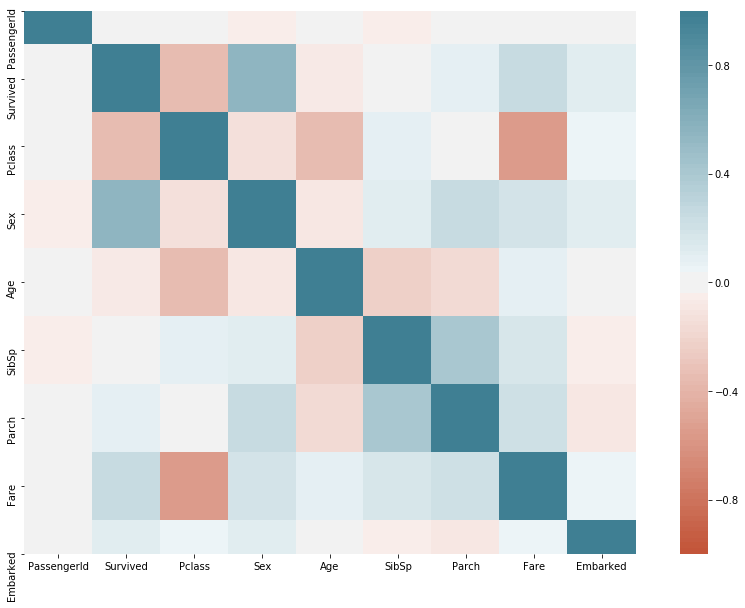

In [31]:
plt.figure(figsize=(16,10))
corr = train_data.corr()
ax = sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=100),square=True)
plt.show()

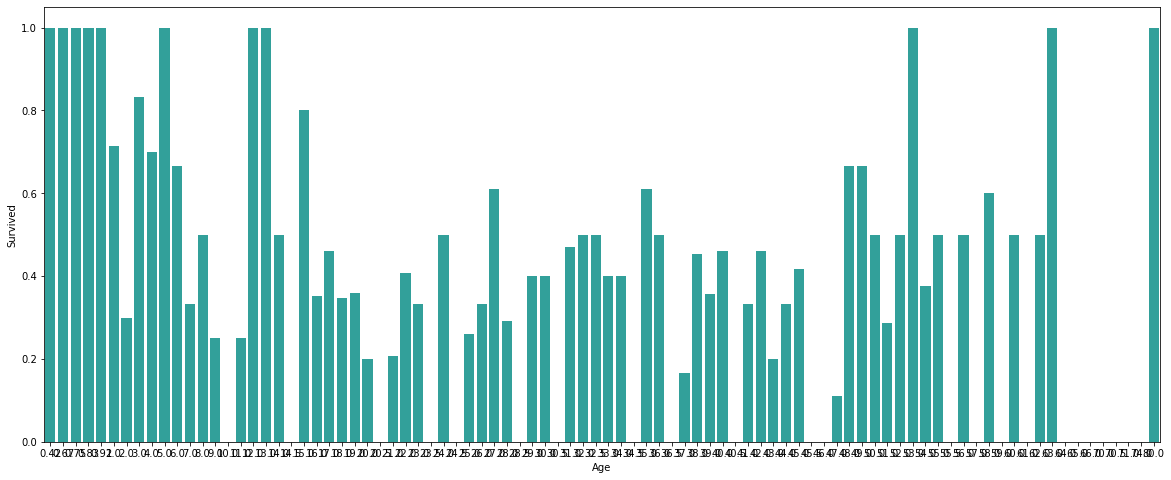

In [32]:
plt.figure(figsize=(20,8))
avg_survival_byage = train_data[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

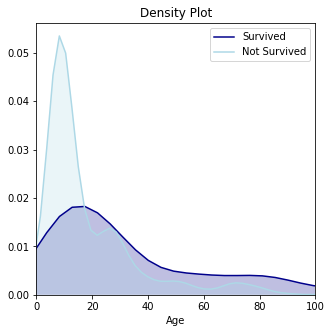

In [33]:
plt.figure(figsize=(5,5))
ax=sns.kdeplot(train_data['Fare'][train_data.Survived==1],color="darkblue",shade=True)
sns.kdeplot(train_data['Fare'][train_data.Survived==0],color="lightblue",shade=True)
plt.legend(["Survived","Not Survived"])
plt.title("Density Plot")
ax.set(xlabel="Age")
plt.xlim(-0,100)
plt.show()

Text(0.5, 1.0, 'Age')

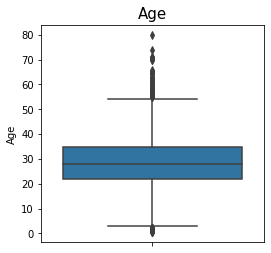

In [34]:
# Analyzing continuous variables
fig, axes = plt.subplots()
fig.set_size_inches(4, 4)
a = sns.boxplot(train_data['Age'] , orient = "v" , ax=axes)
a.set_title("Age",fontsize=15)

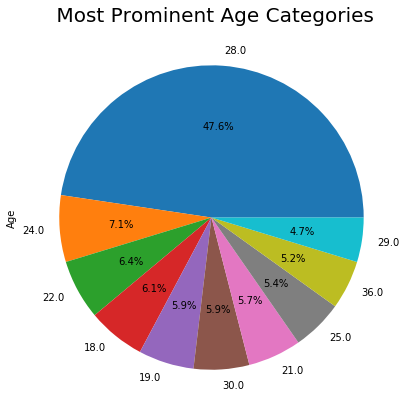

In [35]:
plt.figure(figsize=(7,7))
df = train_data.Age.value_counts().to_frame()
textprops = {"fontsize":10}
df.head(10).Age.plot(kind='pie',autopct='%1.1f%%',textprops =textprops )

plt.title(" Most Prominent Age Categories",fontsize = 20)
plt.show()

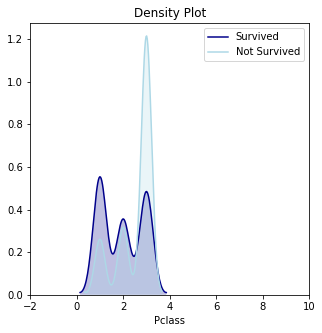

In [36]:
plt.figure(figsize=(5,5))
ax=sns.kdeplot(train_data['Pclass'][train_data.Survived==1],color="darkblue",shade=True)
sns.kdeplot(train_data['Pclass'][train_data.Survived==0],color="lightblue",shade=True)
plt.legend(["Survived","Not Survived"])
plt.title("Density Plot")
ax.set(xlabel="Pclass")
plt.xlim(-2,10)
plt.show()

Text(0.5, 1.0, ' Characteristic Social Class who Not survive Titanic Disaster')

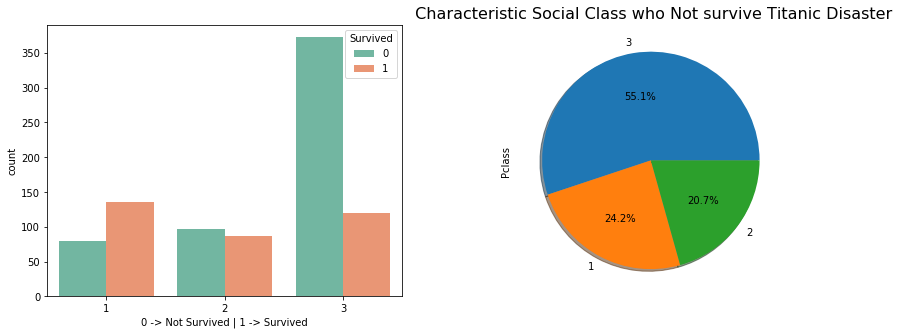

In [37]:
fig,ax=plt.subplots(1,2,figsize=(14,5))
graph = sns.countplot(x='Pclass',data=train_data,hue='Survived',palette='Set2',ax=ax[0])
ax[0].set_xlabel("0 -> Not Survived | 1 -> Survived")
train_data.Pclass.value_counts().plot.pie(ax=ax[1],autopct='%1.1f%%',shadow=True)
ax[1].set_title("0 -> Not Survived | 1 -> Survived")

for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()),
                    ha='center', va='bottom',
                    color= 'white')
        
plt.title(" Characteristic Social Class who Not survive Titanic Disaster",fontsize = 16)

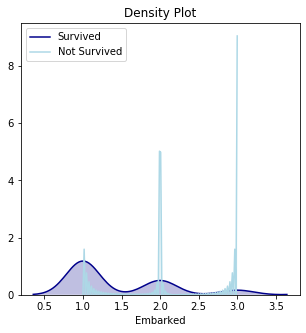

In [38]:
plt.figure(figsize=(5,5))
ax=sns.kdeplot(train_data['Embarked'][train_data.Survived==1],color="darkblue",shade=True)
sns.kdeplot(train_data['Embarked'][train_data.Survived==0],color="lightblue",shade=True)
plt.legend(["Survived","Not Survived"])
plt.title("Density Plot")
ax.set(xlabel="Embarked")
#plt.xlim(-1,5)
plt.show()

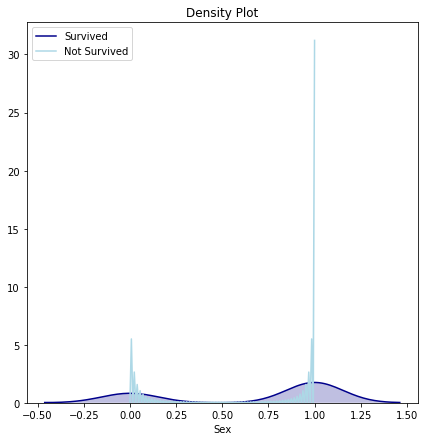

In [39]:
plt.figure(figsize=(7,7))
ax=sns.kdeplot(train_data['Sex'][train_data.Survived==1],color="darkblue",shade=True)
sns.kdeplot(train_data['Sex'][train_data.Survived==0],color="lightblue",shade=True)
plt.legend(["Survived","Not Survived"])
plt.title("Density Plot")
ax.set(xlabel="Sex")
#plt.xlim(-1,5)
plt.show()

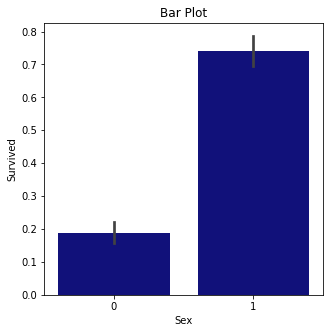

In [40]:
plt.figure(figsize=(5,5))
ax=sns.barplot('Sex',"Survived",data=train_data,color="darkblue")
plt.title("Bar Plot")
ax.set(xlabel="Sex")
#plt.xlim(-1,5)
plt.show()

In [41]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,1
1,2,1,1,1,38.0,1,0,71.2833,2
2,3,1,3,1,26.0,0,0,7.9250,1
3,4,1,1,1,35.0,1,0,53.1000,1
4,5,0,3,0,35.0,0,0,8.0500,1


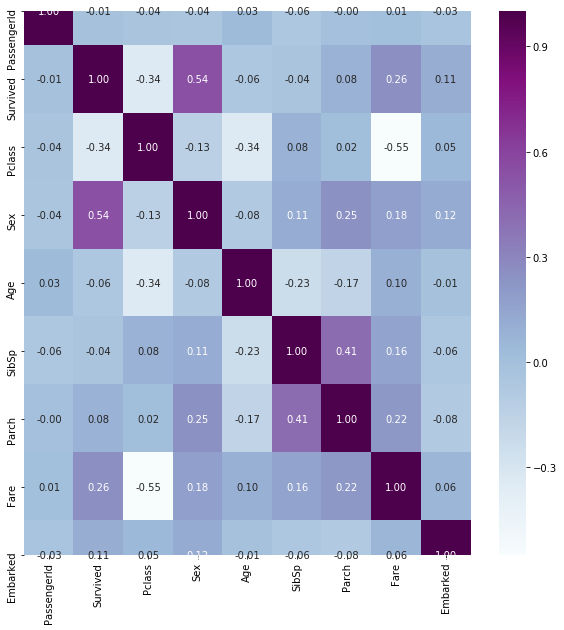

In [42]:
corr_= train_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

# We have dropped Cabin,Name and Ticket features

### Modelling

In [43]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(train_data.drop('Survived', 1), train_data['Survived'], test_size = .3)

In [44]:
LR = LogisticRegression(solver='lbfgs', max_iter=900)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print("Accuracy_train=",accuracy_score(y_train, LR.predict(X_train)))
print("Accuracy_test=",accuracy_score(y_test, LR.predict(X_test)))
#LR_conf_matrix = confusion_matrix(y_test, y_pred)
LR_with_all_feature = accuracy_score(y_test, y_pred)

#print("confussion matrix")
#print(LR_conf_matrix)
#print("\n")
#print("Accuracy of Logistic Regression:",LR_acc_score*100,'\n')
#print(classification_report(y_test,y_pred))

Accuracy_train= 0.8218298555377207
Accuracy_test= 0.7798507462686567


In [45]:
scores = cross_val_score(LR, X_train, y_train, cv=5)
#print('Cross-Validation Accuracy Scores', scores)
#print('Cross-Validation Accuracy Scores', scores.mean())
LR_with_all_feature_cv5=(scores.mean())

In [46]:
scores = cross_val_score(LR, X_train, y_train, cv=10)
#print('Cross-Validation Accuracy Scores', scores)
#print('Cross-Validation Accuracy Scores', scores.mean())
LR_with_all_feature_cv10=scores.mean()

### Finding Feature Importance

### Parch and Sib are more corelated so removing Parch

In [47]:
train_data1 = train_data.copy()
train_data1.drop("Parch",axis=1,inplace=True)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(train_data1.drop('Survived', 1), train_data['Survived'], test_size = .3)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
#print("Accuracy_train=",accuracy_score(y_train, LR.predict(X_train)))
#print("Accuracy_test=",accuracy_score(y_test, LR.predict(X_test)))
#LR_conf_matrix = confusion_matrix(y_test, y_pred)
LR_Parch_Removed = accuracy_score(y_test, y_pred)


In [49]:
scores = cross_val_score(LR, X_train, y_train, cv=5)
#print('Cross-Validation Accuracy Scores', scores)
#print('Cross-Validation Accuracy Scores with 5 Folds', scores.mean())
LR_Parch_Removed_cv5=scores.mean()
scores = cross_val_score(LR, X_train, y_train, cv=10)
#print('Cross-Validation Accuracy Scores', scores)
#print('Cross-Validation Accuracy Scoreswith 10 folds', scores.mean())
LR_Parch_Removed_cv10=scores.mean()

### Data Normalization using Min-Max Method with Parch column

In [50]:
X=train_data.drop('Survived', 1)

In [51]:
X = MinMaxScaler().fit_transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, train_data['Survived'], test_size = .3)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
#print("Accuracy_train=",accuracy_score(y_train, LR.predict(X_train)))
#print("Accuracy_test=",accuracy_score(y_test, LR.predict(X_test)))
#LR_conf_matrix = confusion_matrix(y_test, y_pred)
LR_Minmaxscaler = accuracy_score(y_test, y_pred)

### Data Normalization using Standard Scaler Method  with Parch column

In [53]:
X_1=train_data.drop('Survived', 1)
XX = StandardScaler().fit_transform(X_1)
X_train, X_test, y_train, y_test = train_test_split(XX, train_data['Survived'], test_size = .3)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
#print("Accuracy_train=",accuracy_score(y_train, LR.predict(X_train)))
#print("Accuracy_test=",accuracy_score(y_test, LR.predict(X_test)))
#LR_conf_matrix = confusion_matrix(y_test, y_pred)
LR_stdscaler = accuracy_score(y_test, y_pred)

### Data Normalization using Min-Max Method without Parch column

In [54]:
X=train_data1.drop('Survived', 1)
X = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, train_data1['Survived'], test_size = .3)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
#print("Accuracy_train=",accuracy_score(y_train, LR.predict(X_train)))
#print("Accuracy_test=",accuracy_score(y_test, LR.predict(X_test)))
#LR_conf_matrix = confusion_matrix(y_test, y_pred)
LR_Minmaxscaler_withoutParch = accuracy_score(y_test, y_pred)

### Data Normalization using Standard Scaler Method without Parch column

In [55]:
X=train_data1.drop('Survived', 1)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, train_data1['Survived'], test_size = .3)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
#print("Accuracy_train=",accuracy_score(y_train, LR.predict(X_train)))
#print("Accuracy_test=",accuracy_score(y_test, LR.predict(X_test)))
#LR_conf_matrix = confusion_matrix(y_test, y_pred)
LR_stdscale_withoutParch = accuracy_score(y_test, y_pred)

In [56]:
# --- Create Accuracy Comparison Table ---
compare = pd.DataFrame({'Model': ['LR_with_all_feature','LR_with_all_feature_cv5','LR_with_all_feature_cv10','LR_Parch_Removed','LR_Parch_Removed_cv5','LR_Parch_Removed_cv10','LR_Minmaxscaler','LR_stdscaler','LR_Minmaxscaler_withoutParch','LR_stdscale_withoutParch'], 
                        'Accuracy': [LR_with_all_feature*100,LR_with_all_feature_cv5*100,LR_with_all_feature_cv10*100,LR_Parch_Removed*100,LR_Parch_Removed_cv5*100,LR_Parch_Removed_cv10*100, LR_Minmaxscaler*100, LR_stdscaler*100,LR_Minmaxscaler_withoutParch*100,LR_stdscale_withoutParch*100]})
compare.head(10)
# --- Create Accuracy Comparison Table ---''
#compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

,Model,Accuracy
0,LR_with_all_feature,77.985075
1,LR_with_all_feature_cv5,81.868387
2,LR_with_all_feature_cv10,81.556580
3,LR_Parch_Removed,79.477612
4,LR_Parch_Removed_cv5,79.451613
5,LR_Parch_Removed_cv10,78.832565
6,LR_Minmaxscaler,76.865672
7,LR_stdscaler,80.597015
8,LR_Minmaxscaler_withoutParch,77.238806
9,LR_stdscale_withoutParch,76.492537


In [57]:
compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').hide_index().set_properties(**{'font-family': 'Segoe UI'})

Model,Accuracy
LR_with_all_feature_cv5,81.8684
LR_with_all_feature_cv10,81.5566
LR_stdscaler,80.597
LR_Parch_Removed,79.4776
LR_Parch_Removed_cv5,79.4516
LR_Parch_Removed_cv10,78.8326
LR_with_all_feature,77.9851
LR_Minmaxscaler_withoutParch,77.2388
LR_Minmaxscaler,76.8657
LR_stdscale_withoutParch,76.4925


## Performing all preprocessing and cleaning on Test Data similar to train data

In [58]:
test_data = test_df.copy()
# Deleteing unwanted columns
test_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)
test_data.drop('Ticket', axis=1, inplace=True)

#Handling missing data
test_data["Age"].fillna(test_df["Age"].median(skipna=True), inplace=True)
test_data["Embarked"].fillna(test_df['Embarked'].value_counts().idxmax(), inplace=True)

#Handling categorical data
test_data.loc[test_data["Sex"] == "male", "Sex"] = 0
test_data.loc[test_data["Sex"] == "female", "Sex"] = 1

test_data.loc[test_data["Embarked"] == "S", "Embarked"] = 1
test_data.loc[test_data["Embarked"] == "C", "Embarked"] = 2
test_data.loc[test_data["Embarked"] == "Q", "Embarked"] = 3

In [59]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,3
1,893,3,1,47.0,1,0,7.0000,1
2,894,2,0,62.0,0,0,9.6875,3
3,895,3,0,27.0,0,0,8.6625,1
4,896,3,1,22.0,1,1,12.2875,1


## Generating prediction from Test Data

In [61]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [62]:
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)

In [63]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [65]:
features = ['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

X =train_data.drop('Survived', 1)
y =train_data['Survived']
X_test = test_data[features]

LR.fit(X, y)
predictions = LR.predict(X_test).astype(int)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived_predicted': predictions})
output.to_csv('submission_predicted.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [68]:
df_org=pd.read_csv("submission_org.csv")
df_pred=pd.read_csv("submission_predicted.csv")
#df_org.head()
#df_pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [69]:
mergedRes = pd.merge(df_org, df_pred, on ='PassengerId')

In [70]:
mergedRes.head()

,PassengerId,Survived,Survived_predicted
0,892,0,0
1,893,0,0
2,894,0,0
3,895,0,0
4,896,1,1


In [73]:
LR_prediction = accuracy_score(mergedRes['Survived'], mergedRes['Survived_predicted'])
print("LR accuracy on Test Data=",LR_prediction*100)

LR accuracy on Test Data= 94.97607655502392
